# Pandas

Importamos biblioteca y chequeamos versión. Alias de la biblioteca por usos y costumbres "pd"

In [93]:
import pandas as pd
pd.__version__

'2.0.2'

#### Series de pandas, un numpy array con un índice asociado.

In [94]:
sr = pd.Series([0.25, 0.5, 0.75, 1.0])
sr

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

#### Si quiero obtener numpy y puede acceder a los valores, siempre esta bueno tener a mano "type" para enterarme del tipo que de devuelve una operación.

In [95]:
type(sr.values)

numpy.ndarray

In [96]:
#slice por posicion
print(sr[0:2])


0    0.25
1    0.50
dtype: float64


iloc o acceso por índice implicito, en otra palabras la posición. loc o acceso por índice explicito, el índice de la serie o dataframe. 

In [97]:
#slice por posicion
print(sr.iloc[0:2])
#slice por indice
print(sr.loc[0:2])

0    0.25
1    0.50
dtype: float64
0    0.25
1    0.50
2    0.75
dtype: float64


In [98]:
sr.index = [88,90,95,93]
sr

88    0.25
90    0.50
95    0.75
93    1.00
dtype: float64

In [99]:
#sr = pd.Series([0.25, 0.5, 0.75, 1.0], index=[88,90,95,93])
print(sr.loc[90:93])

90    0.50
95    0.75
93    1.00
dtype: float64


In [100]:
sr

88    0.25
90    0.50
95    0.75
93    1.00
dtype: float64

Los índices no tienen por que ser numeros autoincrementales, pueder ser cadenas o fechas.

In [101]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],  index=['a', 'b', 'c', 'd'])
data['b']


0.5

In [102]:
population_dict = {'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135}

population = pd.Series(population_dict)
population


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

# Dataframe

Estructura de datos n dimensional (Vamos a trabajar solo con 2). Ahora las series son columnas. El dataframe conserva un índice tambien. Corren las mismas reglas para el acceso que vimos con las series.

In [103]:
temp = pd.Series([30.0, 25.0, 31.0, 26.0],  index=[10, 11, 12, 13])
hum  = pd.Series([90, 60, 90, 100],  index=[10, 11, 12, 13])
df = pd.DataFrame({"temperatura":temp, "Humedad":hum})


In [104]:
df

,temperatura,Humedad
10,30.0,90
11,25.0,60
12,31.0,90
13,26.0,100


In [105]:
print(df.index, df.columns, type(df.index), type(df.columns))

Index([10, 11, 12, 13], dtype='int64') Index(['temperatura', 'Humedad'], dtype='object') <class 'pandas.core.indexes.base.Index'> <class 'pandas.core.indexes.base.Index'>


In [106]:
type(df[["Humedad"]])

pandas.core.frame.DataFrame

In [107]:
type(df["Humedad"])

pandas.core.series.Series

Creamos dataframes desde series.

In [108]:
area = pd.Series({'California': 423967, 'Texas': 695662,
 'New York': 141297, 'Florida': 170312,
 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
 'New York': 19651127, 'Florida': 19552860,
 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Sumamos un columna que creemos aportara información útil

In [109]:
data["Densidad"] = data['pop']/data['area']


In [110]:
data["Densidad"]

California     90.413926
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
Name: Densidad, dtype: float64

iloc, acceso basado en indices implicitos

In [111]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


loc, acceso basado en indices explicitos

In [112]:
data.loc[:'Texas', :'pop']


,area,pop
California,423967,38332521
Texas,695662,26448193


In [113]:
import numpy as np
n = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
ldf = pd.DataFrame(n, columns=['a', 'b', 'c'], index=[15, 16, 17])

In [114]:
ldf.loc[16:17, 'b']

16    5
17    8
Name: b, dtype: int32

Atencion con la diferencia...Si el segundo indice es un valor o una lista. El tipo del resultado cambia

In [115]:
print(type(ldf.loc[16:17, 'b']), type(ldf.loc[16:17, ['b']]))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


Y por lo tanto el shape, importante tenerlo en cuenta cuando querramos objetos de clases sklearn que exigen que las predictoras (Aunque sea solo una tenga formato (n,m) y el target (n,)

In [116]:
print(ldf.loc[16:17, 'b'].shape, ldf.loc[16:17, ['b']].shape)

(2,) (2, 1)


In [117]:
ldf.iloc[0:2, 1:2]

,b
15,2
16,5


In [118]:
#data.loc[data.Densidad > 100, ['pop', 'Densidad']]
data.loc[data['Densidad'] > 100, ['pop', 'Densidad']]


,pop,Densidad
New York,19651127,139.076746
Florida,19552860,114.806121


In [119]:
round(data["Densidad"])

California     90.0
Texas          38.0
New York      139.0
Florida       115.0
Illinois       86.0
Name: Densidad, dtype: float64

## Numpy, Pandas y Sklearn en acción (Imputacion)

In [120]:
import numpy as np
data = np.array([[5,    10 ,16],
                 [8,np.NaN ,20],
                 [3,    7  , 1],
                 [3,    9  , 1]])
df =  pd.DataFrame(data, columns=['A', 'B', 'C'])

Esto en un escenario real no es del todo correcto, por ahora obviamos esas cuestiones y nos concentramos en ejemplo con pocos datos que podamos analizar visualmente.

In [121]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(df)
imp.transform(df)

array([[ 5.        , 10.        , 16.        ],
       [ 8.        ,  8.66666667, 20.        ],
       [ 3.        ,  7.        ,  1.        ],
       [ 3.        ,  9.        ,  1.        ]])

Perdi las columnas, al imputador le entregue un dataframe y me retorno un numpy, lo resuelvo asignando el resultado al dataframe

In [122]:
df.loc[:,:] = imp.transform(df)
df

,A,B,C
0,5.0,10.000000,16.0
1,8.0,8.666667,20.0
2,3.0,7.000000,1.0
3,3.0,9.000000,1.0


Puedo ser mas "estrategico" y operar solo con las columnas que dan problemas

In [123]:
data = np.array([[5,    10 ,16],
                 [8,np.NaN ,20],
                 [3,    7  , 1],
                 [3,    9  , 1]])
df =  pd.DataFrame(data, columns=['A', 'B', 'C'])
imp = SimpleImputer(strategy='mean')
imp.fit(df[["B"]])
df.loc[:, ["B"]] = imp.transform(df[["B"]])

Por último una advertencia de la que hay que ocuparse

In [124]:
df.loc[1:2,:]


,A,B,C
1,8.0,8.666667,20.0
2,3.0,7.000000,1.0


In [125]:
df_temp = df.loc[1:2,:]
df_temp["C"] = 77


C:\Users\pabli\AppData\Local\Temp\ipykernel_12680\1285771655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["C"] = 77


Tiene razón, estoy tratando de aplicar una asignacion a una vista del dataset original. ¿Necesito eso? 

In [126]:
df_temp

,A,B,C
1,8.0,8.666667,77
2,3.0,7.000000,77


In [127]:
df

,A,B,C
0,5.0,10.000000,16.0
1,8.0,8.666667,20.0
2,3.0,7.000000,1.0
3,3.0,9.000000,1.0


------------------------------------------------------------------

## Numpy y Pandas en acción (Regresion Lineal)


Creamos una función lineal y a partir de allí datos sintenticos con ruido.

Text(0, 0.5, 'Precio')

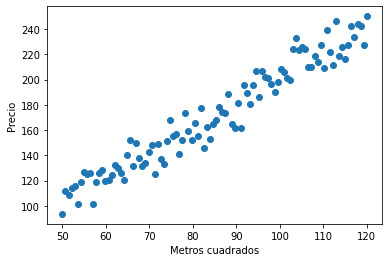

In [128]:
import matplotlib.pyplot as plt
pendiente       = 2.0  
ordenada_origen = 1.0  
n_puntos = 100

# Generar valores de x uniformemente distribuidos entre 0 y 10
X = np.linspace(50, 120, n_puntos)
#Observar que X es un array
y = pendiente*X + ordenada_origen + np.random.normal(0, 10, n_puntos)

plt.plot(X, y, 'o')
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")


In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


Recordemos que (100,) no es lo mismo que (100,1), el método fit (Que veremos mas adelante en detalle) exige que su primer argumento sea bidimensional, esto nos obliga a replantear la forma de X aunque finalmente los datos son los mismos.

In [130]:
#X = X.reshape(-1, 1) o
X = X[:, np.newaxis]

In [131]:
X.shape

(100, 1)

In [132]:
model.fit(X, y)

LinearRegression()

In [133]:
model.fit(X, y)
y_pred = model.predict(X)


Text(0, 0.5, 'Precio')

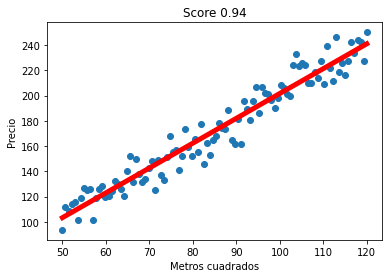

In [134]:

score = model.score(X, y)
plt.plot(X, y, 'o')
plt.plot(X, y_pred, color='red', label='Regresión lineal', lw=5)
plt.title("Score {:.2f}".format(score))
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")


Text(0, 0.5, 'Precio')

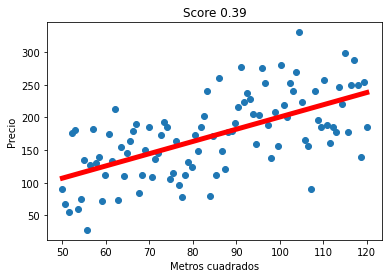

In [135]:
pendiente       = 2.0  
ordenada_origen = 1.0  
n_puntos = 100

# Generar valores de x uniformemente distribuidos entre 0 y 10
X = np.linspace(50, 120, n_puntos)
#Observar que X es un array
y = pendiente*X + ordenada_origen + np.random.normal(0, 50, n_puntos)
X = X.reshape(-1, 1)

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

score = model.score(X, y)
plt.plot(X, y, 'o')
plt.plot(X, y_pred, color='red', label='Regresión lineal', lw=5)
plt.title("Score {:.2f}".format(score))
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")
